# Kaggle Competition
# Titanic: Machine Learning from Disaster

## Variable Description 
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.


In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

In [2]:
# Read the Titanic train and test data as dataframe

train_df = pd.read_csv(r'data/train.csv')
test_df = pd.read_csv(r'data/test.csv')
display(train_df.head(2))
display(test_df.head(2))
display(train_df.info())
display(test_df.info())
#display(train.describe())
#display(train.shape)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


None

In [3]:
# Drop unnecessary columns
# some columns seems unrelated with the survival rate,
# for 'Cabin' there are too many missing values, so drop it
train_df.drop(['Name','Ticket','Cabin','Embarked'], axis=1, inplace=True)
test_df.drop(['Name','Ticket','Cabin','Embarked'], axis=1, inplace=True)
print(train_df.columns)
print(test_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


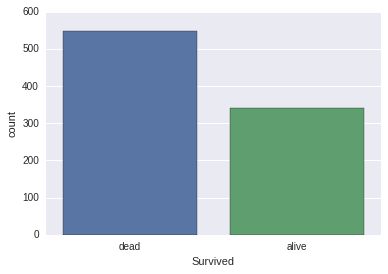

In [4]:
# Explore every column
# Survived
g = sns.countplot(x='Survived',data = train_df)
g.set_xticklabels(('dead','alive'))

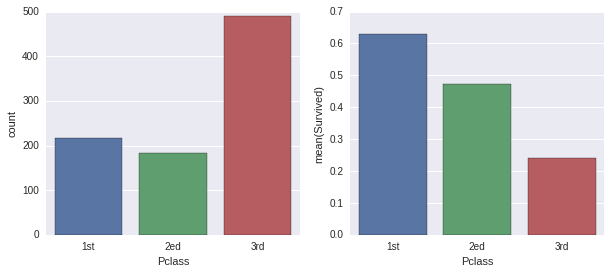

In [5]:
# Pclass
fig, [ax0, ax1] = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

g = sns.countplot(x='Pclass', data = train_df, ax=ax0)
g.set_xticklabels(['1st','2ed','3rd'])

# Pclass to Survived
p_s_prec = train_df.loc[:,['Pclass','Survived']].groupby('Pclass', as_index=False).mean()
g = sns.barplot(x='Pclass', y='Survived', data=p_s_prec, order=[1,2,3], ax=ax1)
g.set_xticklabels(['1st','2ed','3rd'])

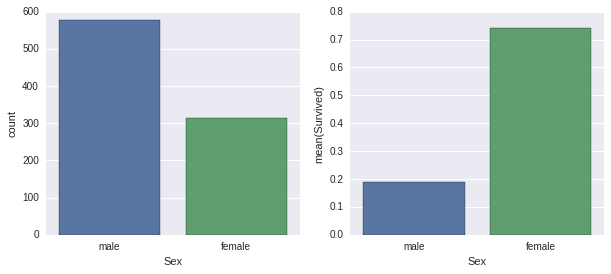

In [6]:
# Sex
# map the 'Sex' from category object to numeric
train_df['Sex'] = train_df['Sex'].map({'male':0, 'female':1})
test_df['Sex'] = test_df['Sex'].map({'male':0, 'female':1})

# count
fig, [ax0, ax1] = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
g = sns.countplot(x='Sex', data = train_df, ax=ax0)
g.set_xticklabels(('male','female'))
# Sex to Survived
s_s_prec = train_df.loc[:,['Sex','Survived']].groupby('Sex', as_index=False).mean()
g = sns.barplot(x='Sex', y='Survived', data=s_s_prec, order=[0,1], ax=ax1)
g.set_xticklabels(['male','female'])

False    714
True     177
Name: Age, dtype: int64
False    332
True      86
Name: Age, dtype: int64


/home/zhaolei/Programs/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


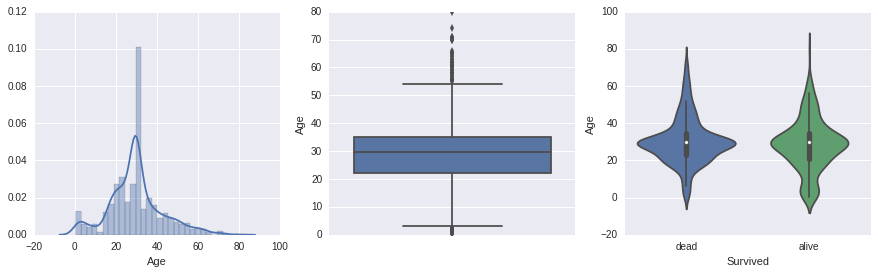

In [7]:
# Age
# deal with missing values
print(train_df.Age.isnull().value_counts())
print(test_df.Age.isnull().value_counts())
# fill the missing age with mean value
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)
fig, [ax0, ax1, ax2] = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
# distribution
g = sns.distplot(train_df['Age'], ax=ax0)
# boxplot
g = sns.boxplot(y='Age', data = train_df, ax=ax1)
# Age to Survived
g = sns.violinplot(x='Survived', y='Age', data=train_df, ax=ax2)
g.set_xticklabels(['dead', 'alive'])

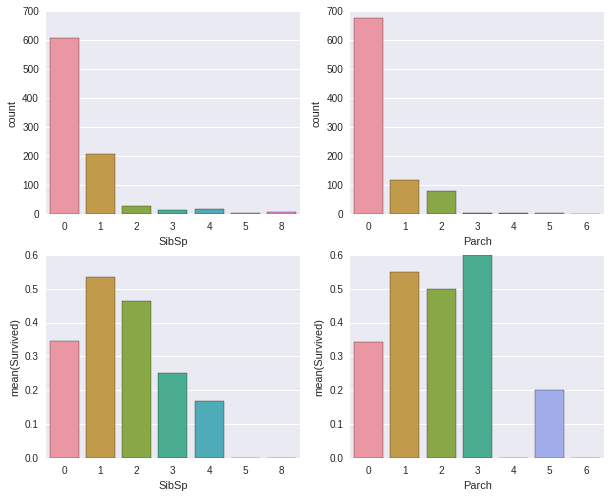

In [8]:
# SibSp & Parch
fig, [[ax0, ax1], [ax2, ax3]] = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# count
g = sns.countplot(x='SibSp', data = train_df, ax=ax0)
g = sns.countplot(x='Parch', data = train_df, ax=ax1)
# SibSp to Survived
si_s_prec = train_df.loc[:,['SibSp','Survived']].groupby('SibSp', as_index=False).mean()
g = sns.barplot(x='SibSp', y='Survived', data=si_s_prec, ax=ax2)
# Parch to Survived
pa_s_prec = train_df.loc[:,['Parch','Survived']].groupby('Parch', as_index=False).mean()
g = sns.barplot(x='Parch', y='Survived', data=pa_s_prec, ax=ax3)

False    417
True       1
Name: Fare, dtype: int64


/home/zhaolei/Programs/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


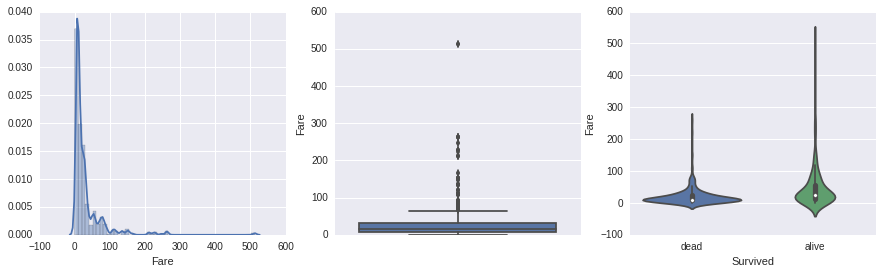

In [9]:
# Fare
# fill the missing age with median value
print(test_df.Fare.isnull().value_counts())
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)
fig, [ax0, ax1, ax2] = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
g = sns.distplot(train_df['Fare'], ax=ax0)
g = sns.boxplot(y='Fare', data = train_df, ax=ax1)
# Fare to Survived
g = sns.violinplot(x='Survived', y='Fare', data=train_df, ax=ax2)
g.set_xticklabels(['dead', 'alive'])

In [13]:
# Prepare data for scikit-learn
variables = ['Pclass','Age','Sex','SibSp','Parch','Fare']
X_train = train_df.loc[:, variables]
#display(X_train.info())
X_train = X_train.values
y_train = train_df.loc[:,'Survived'].values

X_test = test_df.loc[:, variables]
#display(X_test.info())
X_test = X_test.values

In [11]:
# Import the random forest package
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score

# Create the random forest object which will include all the parameters
# for the fit
forest = RandomForestClassifier(n_estimators = 100)

# Fit the training data to the Survived labels and create the decision trees
forest = forest.fit(X_train, y_train)

# Take the same decision trees and run it on the test data
y_test = forest.predict(X_test)

scores = cross_val_score(forest, X_train, y_train, cv=5)
print(scores)
print(scores.mean())  


[ 0.75418994  0.80446927  0.85955056  0.76966292  0.83050847]
0.80367623512


In [12]:
first_model = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': y_test})
first_model.head()
first_model.to_csv(r'output/first_model.csv', index=False)

NameError: name 'test' is not defined